In [16]:
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('data/airline_passengers.csv', parse_dates=True, index_col=0)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.index.freq = 'MS'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## splitting train, test

In [5]:
train = df.iloc[:109]
test = df.iloc[108:]

## fitting model

In [25]:
fitted_model = ExponentialSmoothing(train['Thousands of Passengers'],
                                   trend='add',
                                   seasonal='add',
                                   seasonal_periods=12).fit()

## forecasting

In [26]:
test_predictions = fitted_model.forecast(36)

<AxesSubplot:xlabel='Month'>

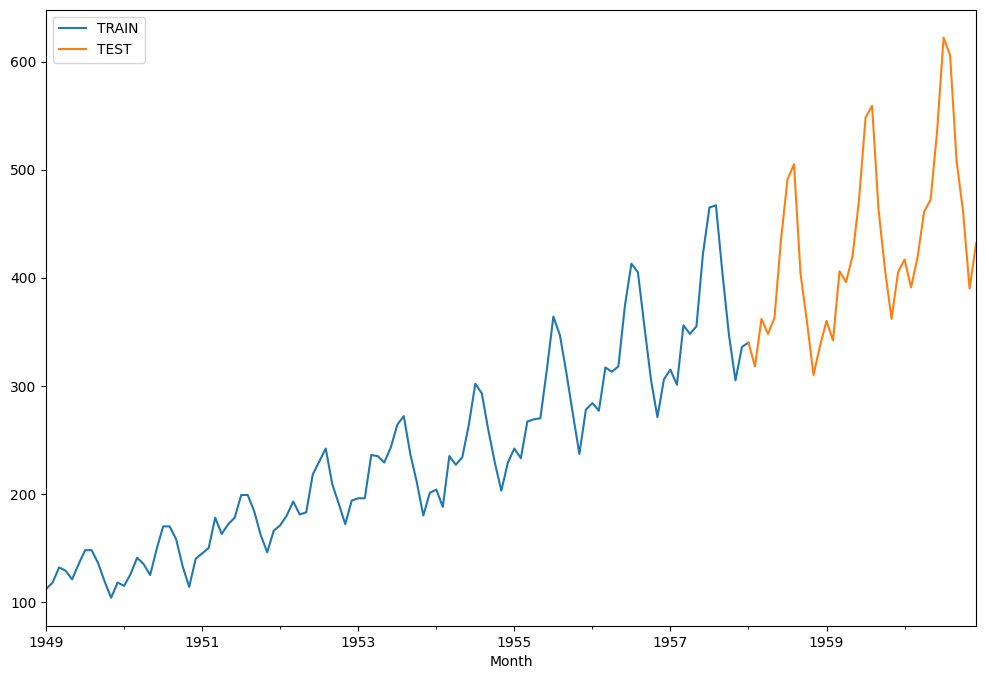

In [9]:
train['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test['Thousands of Passengers'].plot(legend=True, label='TEST', figsize=(12,8))

<AxesSubplot:xlabel='Month'>

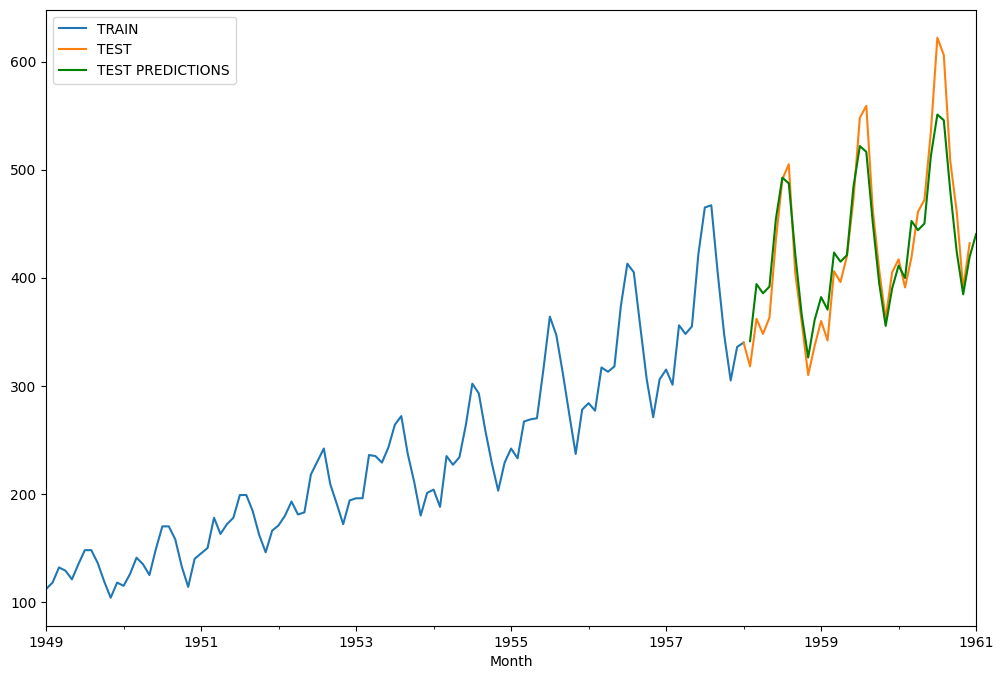

In [28]:
train['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test['Thousands of Passengers'].plot(legend=True, label='TEST', figsize=(12,8))
test_predictions.plot(legend=True, label='TEST PREDICTIONS', figsize=(12,8), color='green')

<AxesSubplot:xlabel='Month'>

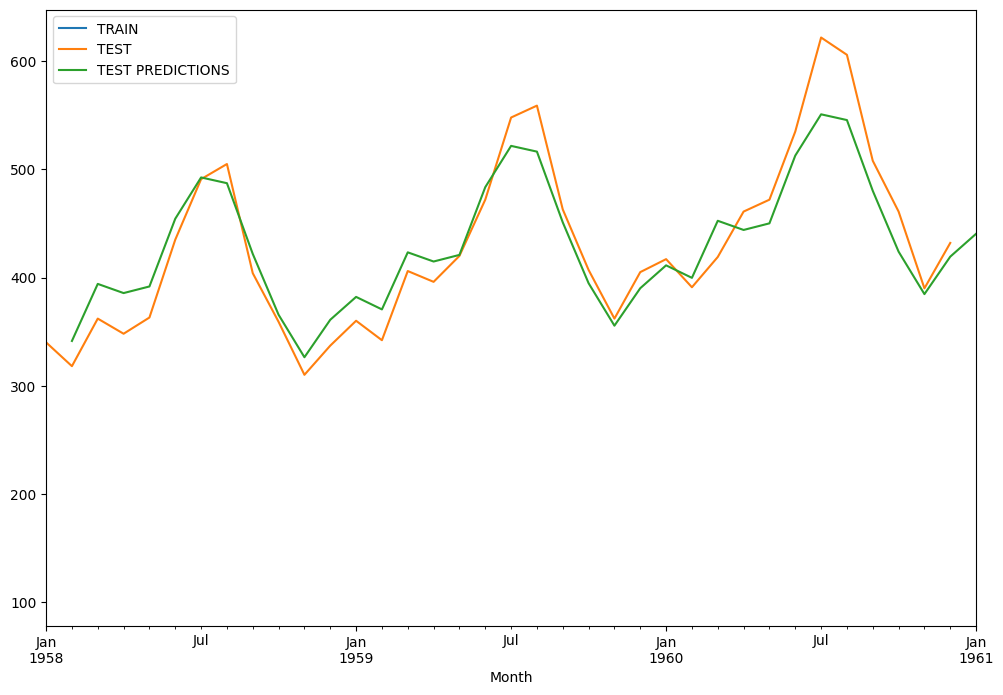

In [29]:
train['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test['Thousands of Passengers'].plot(legend=True, label='TEST', figsize=(12,8))
test_predictions.plot(legend=True, label='TEST PREDICTIONS', figsize=(12,8), xlim=['1958','1961'])

## evaluation

In [18]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Thousands of Passengers,36.0,428.5,79.329152,310.0,362.0,412.0,472.0,622.0


In [27]:
print(mean_absolute_error(test, test_predictions)) 
print(mean_squared_error(test, test_predictions))
print(np.sqrt(mean_squared_error(test, test_predictions)))

45.892139901822304
3083.0244352920536
55.524989286735156


## forecasting in future

In [30]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='add', seasonal='add', 
                                   seasonal_periods=12).fit()

In [31]:
forecast_predictions = final_model.forecast(36)

<AxesSubplot:xlabel='Month'>

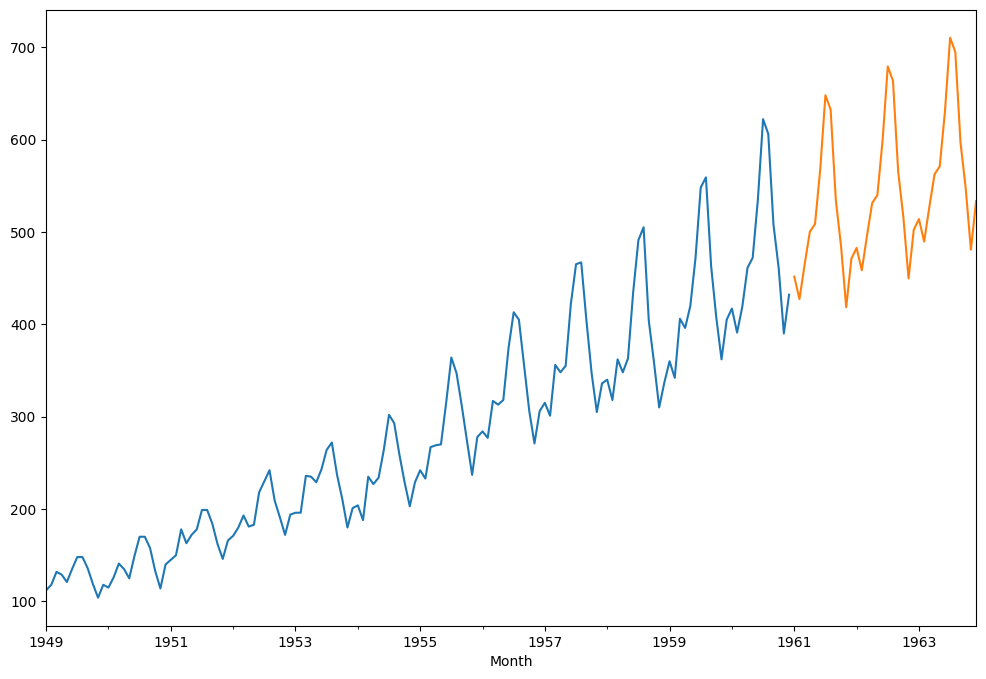

In [32]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()